# Exploratory data analysis of the Irish weather

## Author: Şükrü Deniz Çilek
## Student Number: 24236665



## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

## Question 1 (Loading the dataset and describing, computing years of recordings and temporal resolution)

In [2]:
df_weather = pd.read_csv("weather_1819.csv", skiprows=11)
df_weather.info()

years_of_data = df_weather['year'].nunique()
print(f"\n{years_of_data} Years of recordings included in the dataset")

df_weather['datetime'] = pd.to_datetime(df_weather['day'].astype(str) + '-' + df_weather['month'] + '-' + df_weather['year'].astype(str), format='%d-%b-%Y')
df_weather['datetime_display'] = df_weather['datetime'].dt.strftime('%d-%m-%Y')
time_diff = df_weather['datetime'].diff()
temporal_res = time_diff.mode()[0]

print(f"The temporal resolution of the dataset is: {temporal_res}")

weather_measurements = df_weather.columns.difference(['day','month','year','datetime','station','datetime_display'])
print(weather_measurements)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day      2920 non-null   int64  
 1   month    2920 non-null   object 
 2   year     2920 non-null   int64  
 3   station  2920 non-null   object 
 4   maxtp    2902 non-null   float64
 5   mintp    2902 non-null   float64
 6   rain     2897 non-null   float64
 7   wdsp     2915 non-null   float64
 8   hg       2904 non-null   float64
 9   sun      2913 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 228.3+ KB

2 Years of recordings included in the dataset
The temporal resolution of the dataset is: 1 days 00:00:00
Index(['hg', 'maxtp', 'mintp', 'rain', 'sun', 'wdsp'], dtype='object')


__Question 1:__ First of all we read the csv file with the *pd.read.csv* function, with the attribute *skiprows* because the first 11 rows doesn't contain any data. Then we execute the *info* function to understand the available columns and their data types. After that, we calculate the number of unique years of weather recordings wit the function *nunique*, and print the result. To work with the time in the data, we combine the *day* *month* and *year* columns and create a new column named *datetime* using the *pd.to.datetime* function. This new column allows us to calculate the temporal resolution of the data by finding the time difference between consecutive recordings with the *mode* function, then we printed the result. Lastly, we create a list which we excluded the non-weather related columns and focused on the actual measurements. Respect to the metadata in the csv file:

maxtp: Maximum Air Temperature (C)
mintp: Minimum  Air Temperature (C)
rain: Precipitation Amount (mm)
wdsp: Mean Wind Speed (knot)
hg: Highest Gust (knot)
sun: Sunshine duration (hours)

*Note: I also created a new column named "datetime_display" using the 'datetime' column which I am going to use in the question 3 to display the time nicer"*

## Question 2 (Missing Value Counts and Strategies for Filling)

In [3]:
missing_values = df_weather.isnull().sum()

print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
day                  0
month                0
year                 0
station              0
maxtp               18
mintp               18
rain                23
wdsp                 5
hg                  16
sun                  7
datetime             0
datetime_display     0
dtype: int64


__Question 2:__ In this code chunk, we basically compute the each column's missing value with *isnull* function and then summing them up with *sum*, then printing it.

The missing values in the dataset could be due to sensor failures, reporting errors or data entry issues. When dealing with the missing values in a dataset, there are several strategies to handle them. 

The simpliest way to do it is basically removing the rows that contain any missing values(Complete Case). It is a straightforward method and ensures that only the complete data is used for analysis but it can result in significant data loss and may reduce the sample size which might weaken statistical power respect to number of rows that contains missing values. In our dataset with the small percentage missing data columns this approach could be feasible.

Another method is imputation with median,mean or mode of the columns. This method preserves the sample size and easy to do, but also introduces bias by reducing variabilty, which can affect of our analysis. It also assumes that the missing data is randomly distributed which might not always the case. In the context of our dataset, for the measuerements like temperature we could impute the missing values with mean/median. However for more volatile variables like rainfall or wind speed, this could distort the variabilty.

Next method is Forward/Backward fill method. It is a method that using the most recent available value to fill missing data points, or the next available value. This method works well with the time related datasets, maintaining consistency in values. However, it assumest that the values did not change between measurements, which can lead inaccurate imputation. This method might work for slowly changing variables like temperature, humidity and sunshine duration but could be problematic for variables that change rapidly like wind gusts or precitipation amount with the bigger gaps, but if the missing value period is short we can assume that the wind conditions remain relatively stable. And with the precipitation using this method could work since rainfall patterns often cluster over time.

Last method is interpolation. It is based on estimating the missing values based on the surronding data points using linear or polynomial interpolation. Interpolation provides a smooth transition between data points, making it suitable for time related data, although if the missing data spans large gaps, interpolation might introduce significant inaccuracies.

## Question 3 (Finding Highest Wind, Temperature and Rainfall Amount Across Stations with dates)

In [4]:
highest_wind = df_weather.loc[df_weather['hg'].idxmax()]
print(f"The highest wind speed is recorded at {highest_wind['station']} on {highest_wind['datetime_display']} with the speed of {highest_wind['hg']}.")

max_temperature = df_weather.loc[df_weather['maxtp'].idxmax()]
print(f"The highest maximum temperature is recorded at {max_temperature['station']} on {highest_wind['datetime_display']} with the temperature of {max_temperature['maxtp']} C.")

largest_rain = df_weather.loc[df_weather['rain'].idxmax()]
print(f"The largest amount of rain is recorded at {largest_rain['station']} on {largest_rain['datetime_display']} with {largest_rain['rain']} mm rainfall.")

The highest wind speed is recorded at Knock Airport on 02-01-2018 with the speed of 84.0.
The highest maximum temperature is recorded at Shannon Airport on 02-01-2018 with the temperature of 32.0 C.
The largest amount of rain is recorded at Cork Airport on 15-04-2019 with 54.6 mm rainfall.


__Question 3:__ In this code chunk, we use the *loc* function to find indexes, and the *idxmax* function to identify the row with the maximum value for each specified column. We perform this process for the columns 'hg', 'maxtp', and 'rain', and then print the values using the print function.

## Question 4 (Numerical Summary of Each Weather Measurements)

In [5]:
df_weather[['maxtp','mintp','rain','wdsp','hg','sun']].describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,2902.000000,2902.000000,2897.000000,2915.000000,2904.000000,2913.000000
mean,13.283150,6.432977,3.063583,9.481475,25.443871,3.783797
std,5.146289,4.368755,5.053881,3.820605,9.278313,3.850012
min,-1.800000,-7.000000,0.000000,2.300000,7.000000,0.000000
25%,9.500000,3.100000,0.000000,6.500000,19.000000,0.300000
50%,12.800000,6.400000,0.700000,8.900000,24.000000,2.600000
75%,17.100000,9.600000,4.000000,11.800000,30.000000,6.300000
max,32.000000,18.900000,54.600000,28.500000,84.000000,15.900000


__Question 4:__ For this question I used the *describe* function to get necessary statistics for thhe numerical summary. The maximum and minimum air temperature statistics (mean, min, max) indicates a generally cool conditions with occasional warm spells that during the milder conditions, passenger comfort improves, faciliating smooth boarding and deplaning processes, but also the low temperatures increase the likelihood of ice resulting in hazardous runway conditions and operational disruptions.

Precipitation amounts appear to be low except during exceptional circumstances. This suggests that there are likely to be fewer flight delays or cancellations.

Mean wind speeds average 9.48 m/s, indicating generally favorable conditions for aircraft operations. However, the maximum wind speed suggests that strong winds can pose safety risks during takeoffs and landings, potentially leading to delays.

The highest gust recorded is 25.44 knots, which can improve air quality. However, these strong gusts may create dangerous conditions during critical flight phases, increasing the risk of accidents.

With an average of 3.78 hours of sunshine, conditions are favorable for solar energy generation and passenger comfort. However, prolonged sunshine without adequate rainfall may lead to dry conditions, affecting green space maintenance.

## Question 5 (Graphical Summary of Weather Measurements)

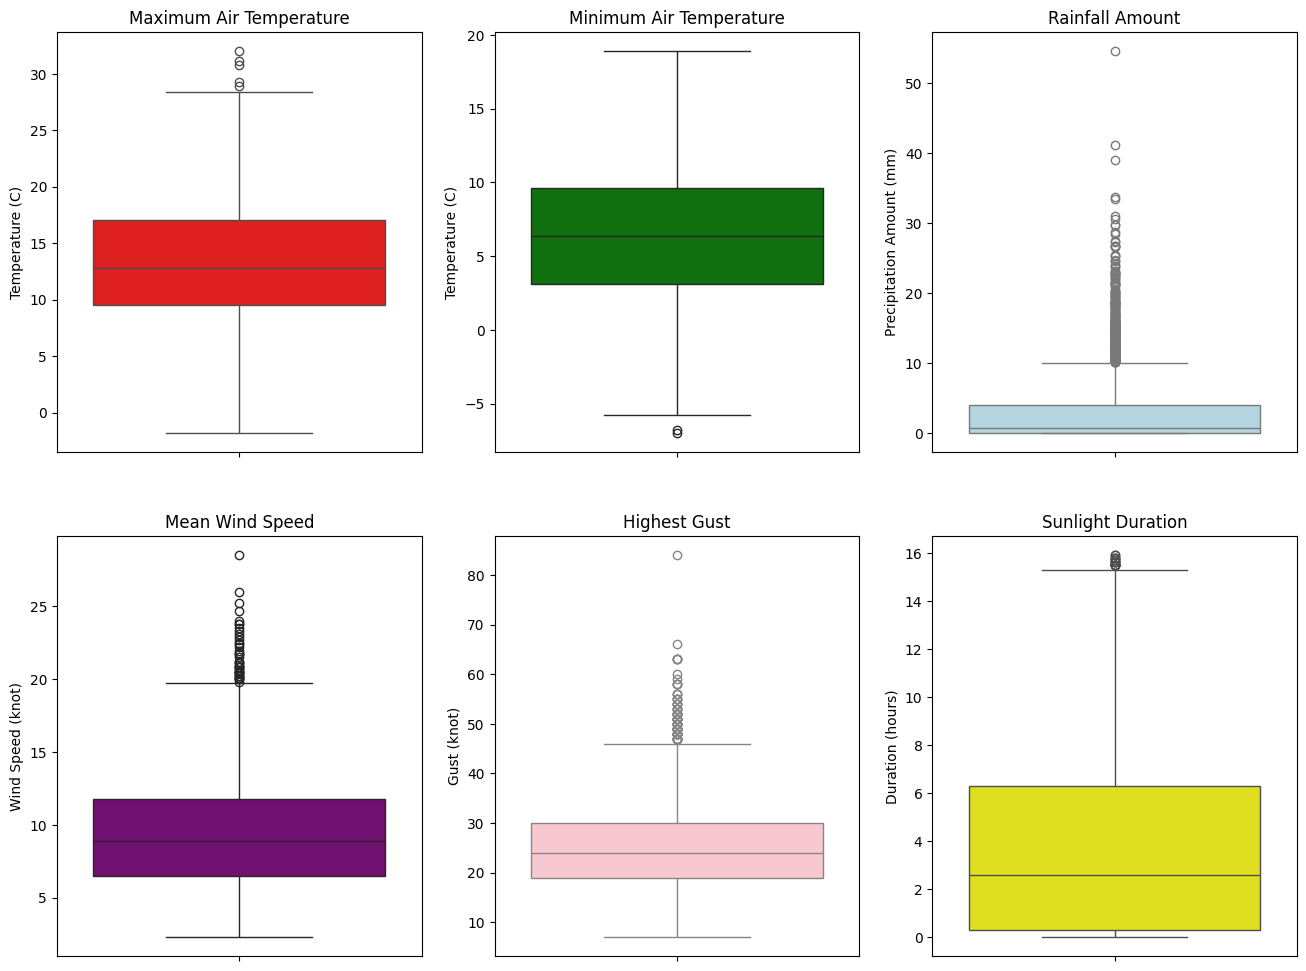

In [6]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
sns.boxplot(y=df_weather['maxtp'], color='r')
plt.title('Maximum Air Temperature')
plt.ylabel('Temperature (C)')

plt.subplot(2,3,2)
sns.boxplot(y=df_weather['mintp'], color='g')
plt.title('Minimum Air Temperature')
plt.ylabel('Temperature (C)')

plt.subplot(2,3,3)
sns.boxplot(y=df_weather['rain'], color='lightblue')
plt.title('Rainfall Amount')
plt.ylabel('Precipitation Amount (mm)')

plt.subplot(2,3,4)
sns.boxplot(y=df_weather['wdsp'], color='purple')
plt.title('Mean Wind Speed')
plt.ylabel('Wind Speed (knot)')

plt.subplot(2,3,5)
sns.boxplot(y=df_weather['hg'], color='pink')
plt.title('Highest Gust')
plt.ylabel('Gust (knot)')

plt.subplot(2,3,6)
sns.boxplot(y=df_weather['sun'], color='yellow')
plt.title('Sunlight Duration')
plt.ylabel('Duration (hours)')

plt.show()

__Question 5:__ In this code chunk, I plotted the all variables in 1 figure, with the *subplot* functions, and also resize the figure at the beginning. I used the seaborn's boxplot function, for each column, and recolored the boxes. Lastly, I set the title and Y axis names for each plot with *plt.title* and *plt.ylabel* 

In the initial summary, we see that there are few outliers for maximum and minimum temperatures, as well as for sunlight duration. However, rainfall amount and wind-related variables, such as mean wind speed and highest gust, show a considerable number of outliers. These outliers in rainfall are likely due to rare but significant events like heavy rainstorms, which can cause spikes in precipitation. Such extreme values may lead to operational disruptions at airports, including flight delays or cancellations due to poor visibility and unsafe conditions. Similarly, outliers in wind speed and gusts indicate extreme weather events, such as storms or sudden changes in wind patterns, which can pose safety risks during critical flight phases. These events may also cause delays or infrastructure damage. Additionally, some outliers could be linked to natural variation or measurement errors, suggesting the need for careful data validation. Recognizing and preparing for these outlier events is crucial for maintaining safety and efficiency at airports, as they represent rare but potentially high-impact risks.

## Question 6 (Scatter plot of Mean Win Speed vs Highest Gust)

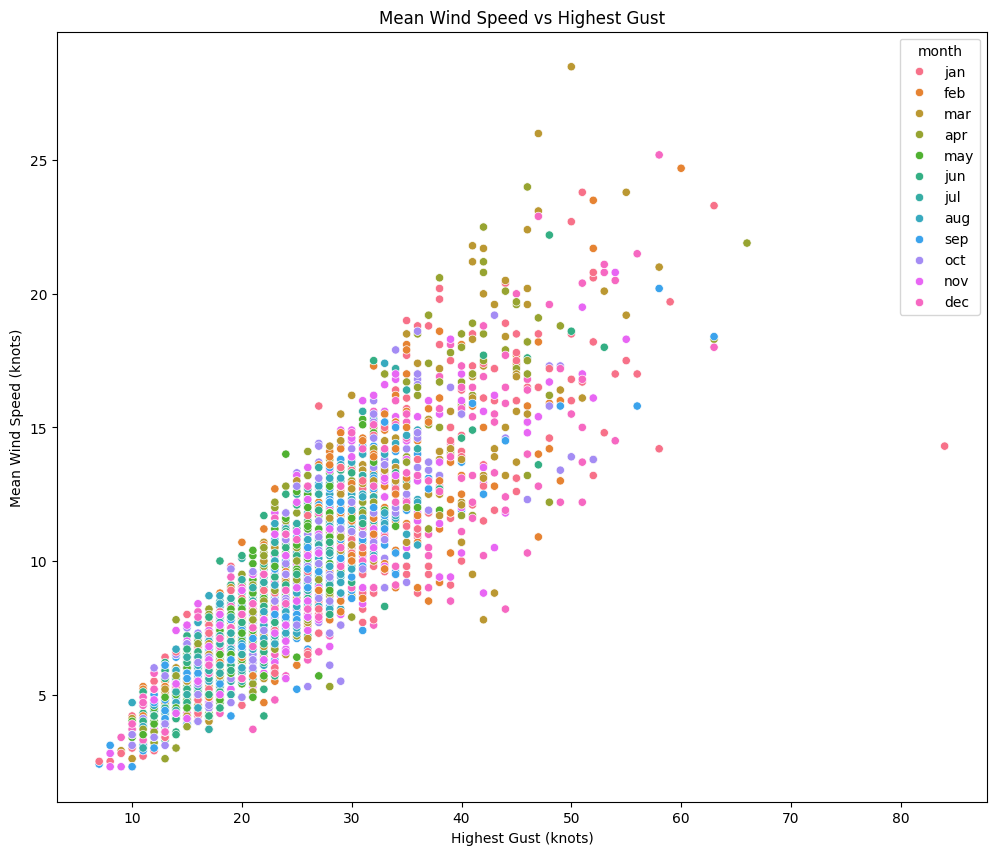

In [7]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_weather,x='hg',y='wdsp', hue='month' )
plt.xlabel('Highest Gust (knots)')
plt.ylabel('Mean Wind Speed (knots)')
plt.title("Mean Wind Speed vs Highest Gust")

plt.show()

__Question 6:__ In this code chunk, first of all I resized the figure with the *figsize*. Then used the seaborn's scatterplot function, defining the data and giving the axis variables, also with the *hue* attribute, I filled the points respect to the months. With this scatterplot, we can observe that there is a clear positive relationship between two variables. As the highest gust increases, mean wind speed also tends to increase. The dots evenly distributed in the plot, though there are some visible differences in spread, like higher gusts seem to occur during the winter months.

---

## Question 7 (Computing and adding new column 'Daily Temperature Range')

In [8]:
df_weather["dailytemprange"] = df_weather['maxtp'] - df_weather['mintp']

df_weather.tail(10)

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,datetime,datetime_display,dailytemprange
2910,22,dec,2019,Knock Airport,7.0,2.7,4.8,8.0,20.0,3.1,2019-12-22,22-12-2019,4.3
2911,23,dec,2019,Knock Airport,6.9,3.0,5.0,10.5,29.0,2.7,2019-12-23,23-12-2019,3.9
2912,24,dec,2019,Knock Airport,6.6,3.1,0.7,8.4,24.0,2.9,2019-12-24,24-12-2019,3.5
2913,25,dec,2019,Knock Airport,4.9,1.4,0.0,9.0,32.0,0.0,2019-12-25,25-12-2019,3.5
2914,26,dec,2019,Knock Airport,10.0,4.8,6.2,12.2,34.0,0.0,2019-12-26,26-12-2019,5.2
2915,27,dec,2019,Knock Airport,10.8,9.8,3.7,12.8,29.0,0.0,2019-12-27,27-12-2019,1.0
2916,28,dec,2019,Knock Airport,9.8,7.9,0.0,14.8,30.0,0.0,2019-12-28,28-12-2019,1.9
2917,29,dec,2019,Knock Airport,10.5,7.0,0.0,12.8,32.0,0.1,2019-12-29,29-12-2019,3.5
2918,30,dec,2019,Knock Airport,9.6,3.4,NaN,8.4,21.0,0.0,2019-12-30,30-12-2019,6.2
2919,31,dec,2019,Knock Airport,6.0,1.3,0.0,7.1,18.0,2.1,2019-12-31,31-12-2019,4.7


__Question 7:__ With the first line, I added a new column *dailytemprange* to the dataframe, with taking the difference between maximum temperature and minimum temperature each row. Then I printed the last 10 rows with the *tail* function.

---

## Question 8 (Plotting Daily Temperature vs Sunlight Duration)

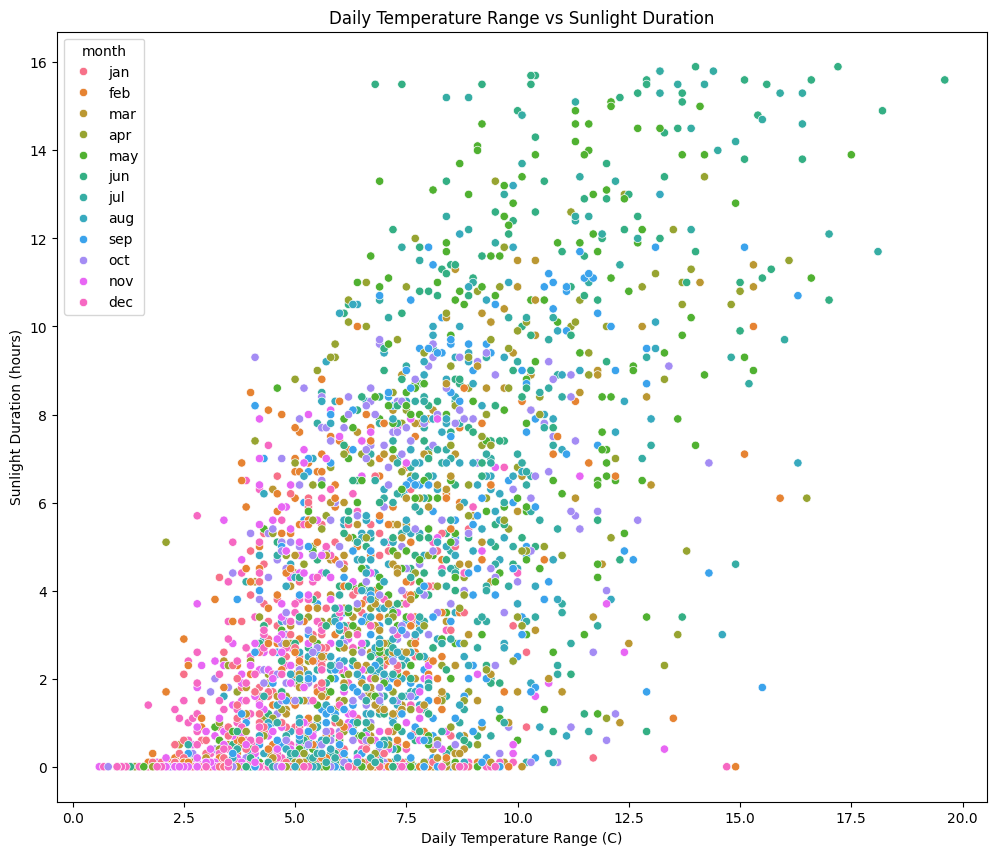

In [9]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_weather,x='dailytemprange',y='sun', hue='month' )
plt.xlabel('Daily Temperature Range (C)')
plt.ylabel('Sunlight Duration (hours)')
plt.title("Daily Temperature Range vs Sunlight Duration")

plt.show()

__Question 8:__ For the plot, I used the same code for the scatterplot I did in the last plot. The plot shows the relationship between two variables has a slight positive correlation, although this trend isn't strictly linear. The winther months generally have lower sunlight duration and with that the daily temperature range also smaller. Summer months tend to have higher sunlight durations, up to 16 hours, and higher daily temperature ranges. In summary, the days with the longer sunlight durations generally have larger daily temperature ranges.

---

## Question 9 (Comparative Analysis of the Weather at Dublin, Shannon, Cork Airports)

In [10]:
dublin = df_weather[df_weather['station'] == 'Dublin Airport']
shannon = df_weather[df_weather['station'] == 'Shannon Airport']
cork = df_weather[df_weather['station'] == 'Cork Airport']

### Dublin Airport Weather Summary

In [11]:
dublin[['maxtp','mintp','rain','wdsp','hg','sun','dailytemprange']].describe()

,maxtp,mintp,rain,wdsp,hg,sun,dailytemprange
count,730.000000,730.000000,726.000000,728.000000,728.000000,729.000000,730.000000
mean,13.592603,5.724247,2.147383,9.542720,24.943681,4.046091,7.868356
std,5.265505,4.488748,4.120571,3.829729,8.438033,3.952654,3.363322
min,-0.500000,-5.800000,0.000000,3.000000,9.000000,0.000000,1.000000
25%,9.500000,2.400000,0.000000,6.700000,19.000000,0.600000,5.500000
50%,13.000000,5.600000,0.200000,8.800000,24.000000,2.900000,7.400000
75%,17.875000,8.900000,2.300000,11.500000,30.000000,6.600000,10.100000
max,26.700000,17.800000,24.200000,28.500000,56.000000,15.900000,18.100000


### Shannon Airport Weather Summary

In [12]:
shannon[['maxtp','mintp','rain','wdsp','hg','sun','dailytemprange']].describe()

,maxtp,mintp,rain,wdsp,hg,sun,dailytemprange
count,723.000000,723.000000,721.000000,730.000000,724.000000,728.000000,723.000000
mean,14.160028,7.267082,2.844383,9.264658,24.968232,3.900275,6.892946
std,5.106169,4.442844,4.402685,4.013313,9.576674,3.883124,2.902772
min,0.000000,-5.000000,0.000000,2.300000,7.000000,0.000000,1.300000
25%,10.250000,3.850000,0.000000,6.100000,18.000000,0.500000,4.850000
50%,13.600000,7.200000,0.800000,8.750000,24.000000,2.700000,6.500000
75%,17.750000,10.850000,3.900000,11.700000,30.000000,6.500000,8.600000
max,32.000000,18.900000,33.400000,25.200000,66.000000,15.600000,19.600000


### Cork Airport Weather Summary

In [13]:
cork[['maxtp','mintp','rain','wdsp','hg','sun','dailytemprange']].describe()

,maxtp,mintp,rain,wdsp,hg,sun,dailytemprange
count,723.000000,723.000000,723.000000,728.000000,726.000000,727.000000,723.000000
mean,13.262517,6.955325,3.470124,9.758516,25.976584,4.225860,6.307192
std,4.894583,4.203288,6.137343,3.749587,9.336514,4.055068,2.387735
min,-1.800000,-7.000000,0.000000,2.900000,10.000000,0.000000,0.600000
25%,9.750000,3.750000,0.000000,6.700000,19.000000,0.300000,4.500000
50%,12.500000,7.000000,0.700000,9.100000,24.500000,3.100000,6.500000
75%,17.100000,9.900000,4.250000,12.200000,32.000000,7.250000,8.000000
max,26.700000,16.500000,54.600000,23.800000,63.000000,15.700000,13.900000


### Graphical Summaries (Plots)

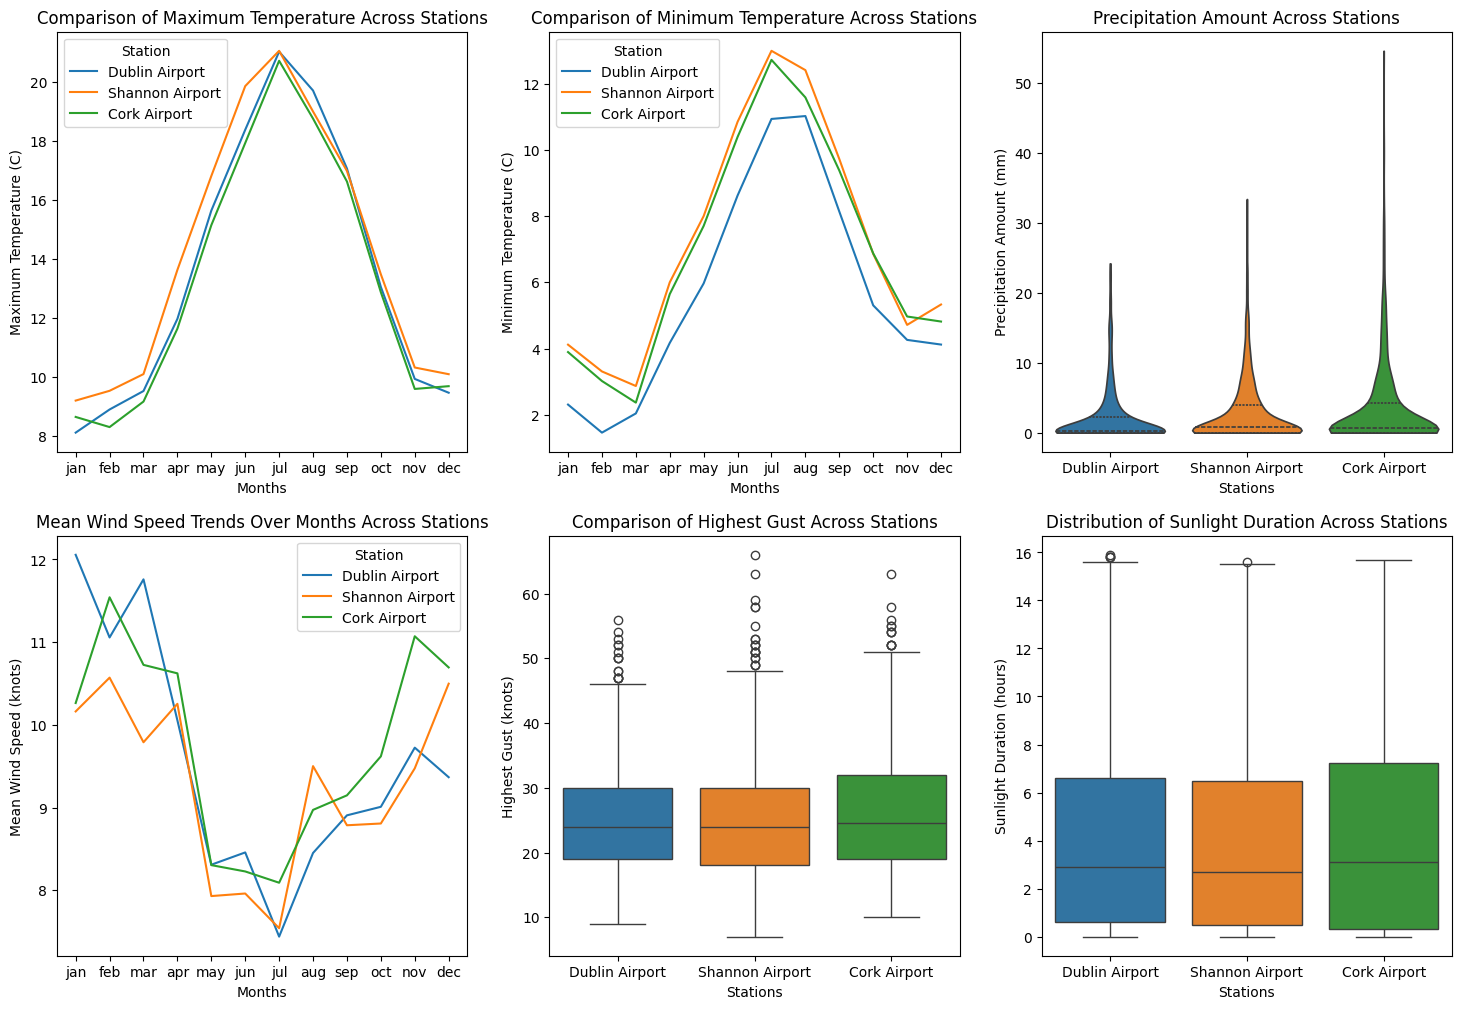

In [14]:
filtered_df = df_weather[df_weather['station'].isin(['Dublin Airport', 'Shannon Airport', 'Cork Airport'])]


plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.lineplot(data=filtered_df, x='month', y='maxtp', hue='station', errorbar=None)
plt.xlabel('Months')
plt.ylabel('Maximum Temperature (C)')
plt.legend(title='Station')
plt.title('Comparison of Maximum Temperature Across Stations')

plt.subplot(2,3,2)
sns.lineplot(data=filtered_df, x='month', y='mintp', hue='station', errorbar=None)
plt.xlabel('Months')
plt.ylabel('Minimum Temperature (C)')
plt.legend(title='Station')
plt.title('Comparison of Minimum Temperature Across Stations')

plt.subplot(2,3,3)
sns.violinplot(data=filtered_df, x='station', y='rain', hue='station', inner='quartile', cut=0)
plt.xlabel('Stations')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Precipitation Amount Across Stations')

plt.subplot(2,3,4)
sns.lineplot(data=filtered_df, x='month', y='wdsp', hue='station', errorbar=None)
plt.xlabel('Months')
plt.ylabel('Mean Wind Speed (knots)')
plt.legend(title='Station')
plt.title('Mean Wind Speed Trends Over Months Across Stations')

plt.subplot(2,3,5)
sns.boxplot(data=filtered_df, x='station', y='hg', hue='station')
plt.xlabel('Stations')
plt.ylabel('Highest Gust (knots)')
plt.title('Comparison of Highest Gust Across Stations')

plt.subplot(2,3,6)
sns.boxplot(data=filtered_df, x='station', y='sun', hue='station')
plt.xlabel('Stations')
plt.ylabel('Sunlight Duration (hours)')
plt.title('Distribution of Sunlight Duration Across Stations')

plt.show()

__Question 9:__ For this question, I first created subsets of the dataframe for each of the three airports separately. I then used the *describe* function to generate numerical summaries. For the plotting section, I filtered the dataframe to include only Dublin, Cork, and Shannon airports, excluding Knock Airport by using the *isin* function. For the graphical summaries, I used separate plots for each variable, organized as subplots within a single figure. Specifically, I used a line plot to visualize monthly variations for temperature-related variables and mean wind speed, a violin plot for rainfall amount to observe the density distribution, and box plots for highest gust and sunlight duration. From these plots, we can make several observations. While temperatures across the airports are generally similar, Shannon Airport shows slightly higher temperature ranges than the other two. Cork Airport has noticeably higher rainfall amounts compared to the others. Examining the monthly trend for mean wind speed, we observe that Cork Airport generally records higher wind speeds. For the highest gust measurements, Cork Airport often reaches higher values, with the single highest gust recorded at Shannon Airport. In terms of sunlight duration, all three stations show similar patterns overall, with Cork slightly ahead in terms of average duration, while Dublin recorded the highest sunlight measurements. 

In general, while temperature and sunlight duration values are similar across the airports, Cork Airport stands out for its higher rainfall and wind speed measurements, and Shannon Airport has the highest recorded gust measurement.